## The SLR Model
A simple leanear regression (SLR) model is a model for bivariate data $(Z, Y)$ in which $Y$ is viewed as a function of $Z$, $\beta_{0} + \beta_{1}X$, plus the random error, $\epsilon$:


\begin{align}
Y = \beta_{0} + \beta_{1}X(Z) + \epsilon.
\end{align}

## Loading Data

In [105]:
library('dplyr')
if (!exists('opt_org')) opt_org = options()

df = read.csv('./data/tool_wear_data.csv')
head(df)

Velocity,Time,Wear,Order
400,130,0.03,4
400,75,0.02,18
400,37,0.01,14
600,200,0.09,25
600,180,0.08,22
600,170,0.07,5


## Filtering Data
Choose rows with Velocity=800.

In [110]:
df_f = filter(df, Velocity==800)

### Scatterplot of the Data

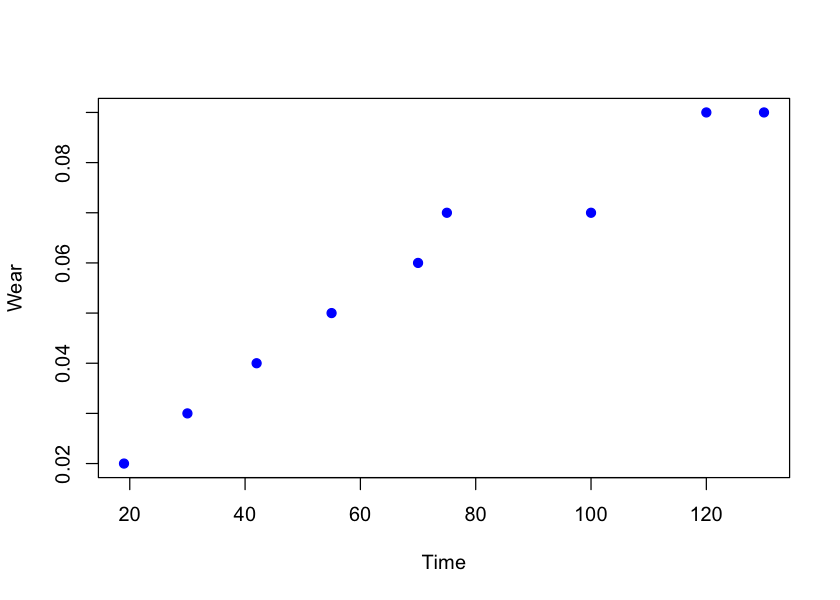

In [160]:
options(repr.plot.height=5)
plot(df_f$Time,  df_f$Wear, pch=19, xlab='Time', ylab='Wear', col='blue')

## SLR Model on the Original Data

### Model Fitting

In [157]:
model = lm(Wear~Time, data=df_f)
model.summ = summary(model)
model.summ


Call:
lm(formula = Wear ~ Time, data = df_f)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0057309 -0.0044464  0.0004526  0.0023425  0.0098654 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.335e-02  3.868e-03    3.45   0.0107 *  
Time        6.239e-04  4.823e-05   12.93 3.84e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.005332 on 7 degrees of freedom
Multiple R-squared:  0.9598,	Adjusted R-squared:  0.9541 
F-statistic: 167.3 on 1 and 7 DF,  p-value: 3.839e-06


### Plot of the Regression Line and the Data

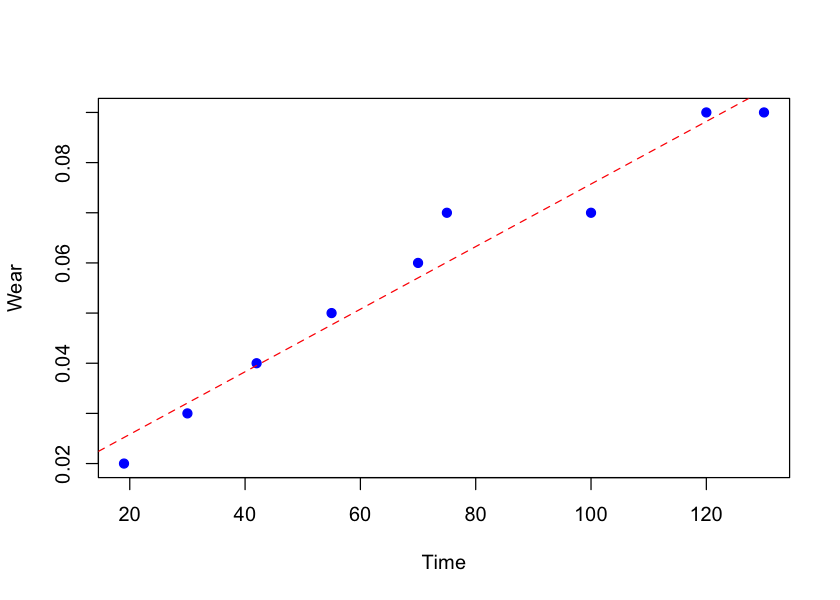

In [158]:
plot(df_f$Time,  df_f$Wear, pch=19, xlab='Time', ylab='Wear', col='blue')
abline(a=model.summ$coefficients[1], b=model.summ$coefficients[2], col='red', lty=2)

### Residuals vs. Regressor Plot

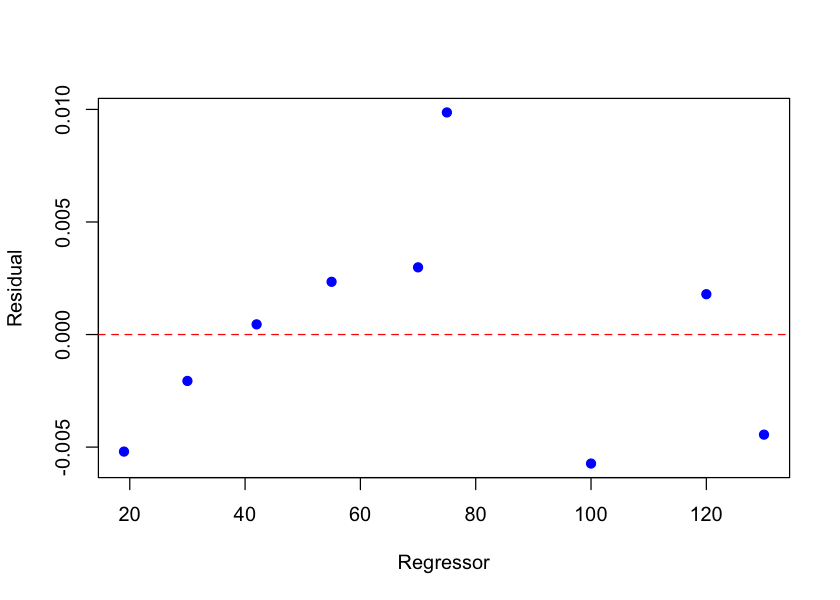

In [127]:
plot(df_f$Time,  model.summ$residuals, pch=19, xlab='Regressor', ylab='Residual', col='blue')
abline(h=0, col='red', lty=2)

## Fitting New Models on Transformed Data: Case 1
Let's fit a new model $y \sim \sqrt{x}$

### Scatterplot of Transformed Data

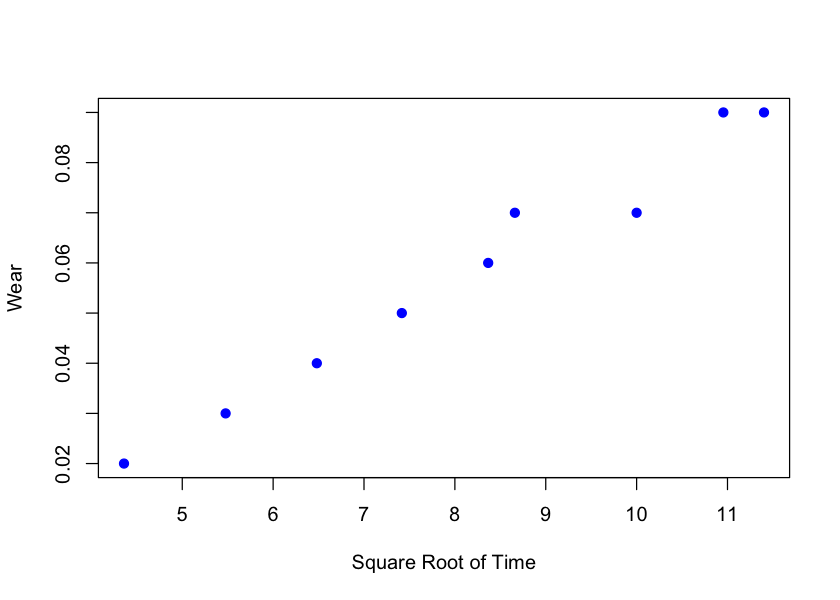

In [163]:
plot(sqrt(df_f$Time),  df_f$Wear, pch=19, xlab='Square Root of Time', ylab='Wear', col='blue')

### Fitting Model

In [165]:
model = lm(Wear ~ sqrt(Time), data=df_f)
model.summ = summary(model)
model.summ


Call:
lm(formula = Wear ~ sqrt(Time), data = df_f)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0068283 -0.0010631 -0.0005899  0.0004568  0.0067767 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.024721   0.004844  -5.103  0.00139 ** 
sqrt(Time)   0.010155   0.000574  17.692 4.54e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.003935 on 7 degrees of freedom
Multiple R-squared:  0.9781,	Adjusted R-squared:  0.975 
F-statistic:   313 on 1 and 7 DF,  p-value: 4.544e-07


### Plot of Regression Line and Transformed Data

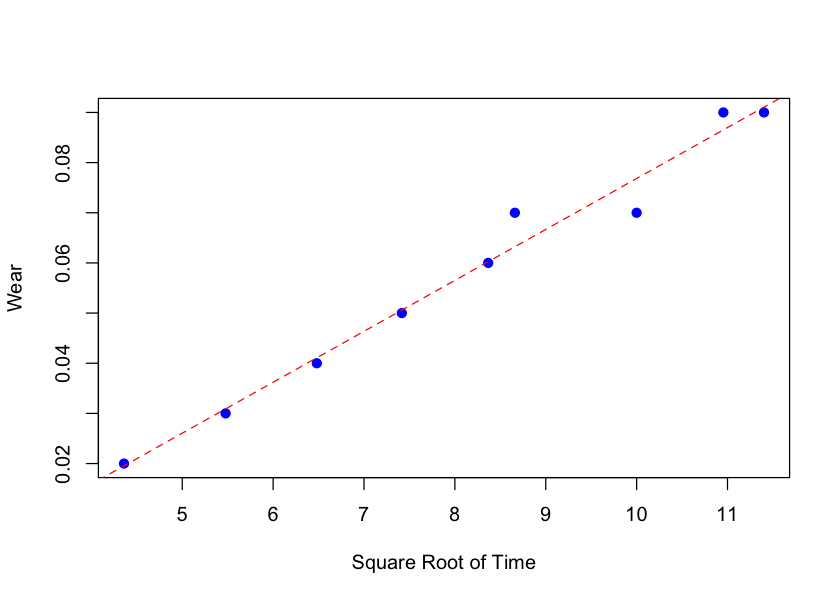

In [166]:
plot(sqrt(df_f$Time), df_f$Wear, pch=19, xlab='Square Root of Time', ylab='Wear', col='blue')
abline(a=model.summ$coefficients[1], b=model.summ$coefficients[2], col='red', lty=2)

### Residuals vs. Regressor Plot

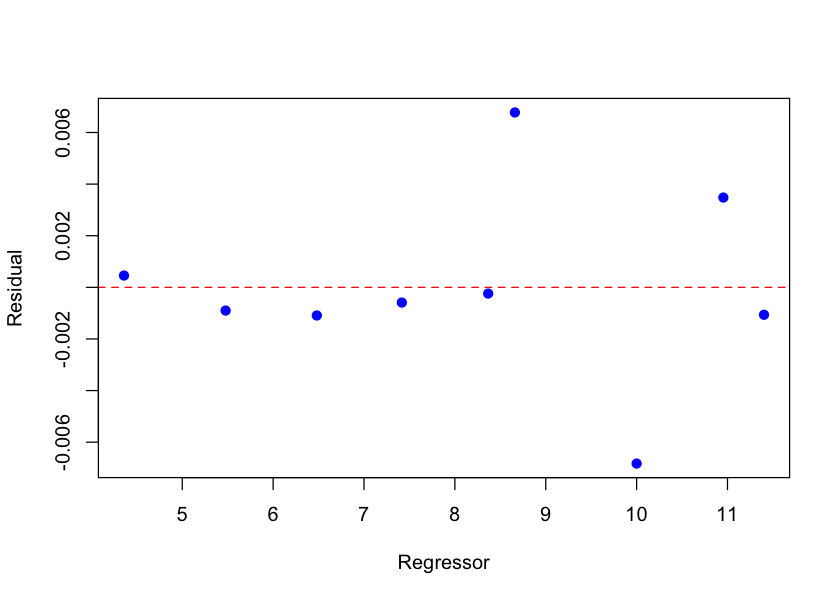

In [167]:
plot(sqrt(df_f$Time),  model.summ$residuals, pch=19, xlab='Regressor', ylab='Residual', col='blue')
abline(h=0, col='red', lty=2)

## Fitting New Models on Transformed Data: Case 2
Let's fit another model $sqr(y) \sim x$.

### Scatterplot of Transformed Data

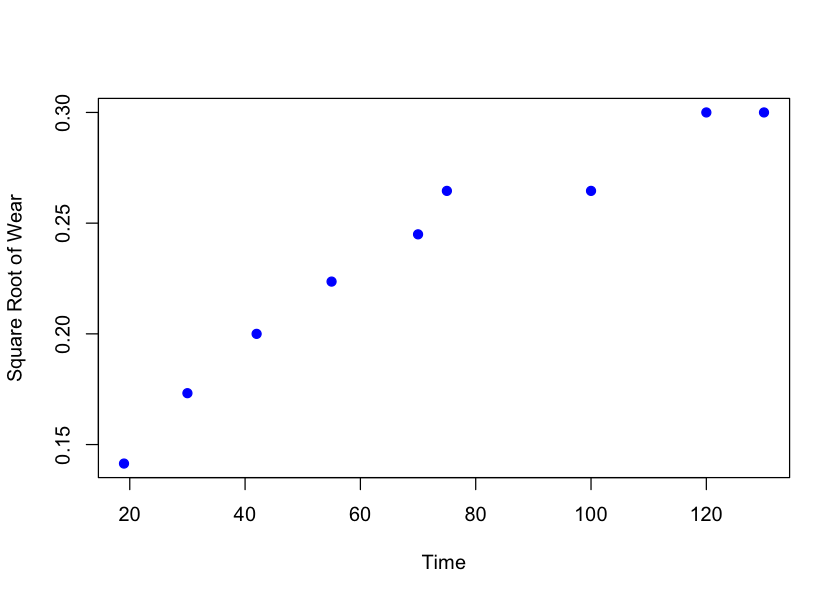

In [169]:
plot(df_f$Time,  sqrt(df_f$Wear), pch=19, xlab='Time', ylab='Square Root of Wear', col='blue')

### Fitting Model

In [170]:
model = lm(sqrt(Wear) ~ Time, data=df_f)
model.summ = summary(model)
model.summ


Call:
lm(formula = sqrt(Wear) ~ Time, data = df_f)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0224212 -0.0091774 -0.0008908  0.0109153  0.0247454 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.138061   0.011388  12.123 5.94e-06 ***
Time        0.001357   0.000142   9.555 2.89e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0157 on 7 degrees of freedom
Multiple R-squared:  0.9288,	Adjusted R-squared:  0.9186 
F-statistic: 91.29 on 1 and 7 DF,  p-value: 2.887e-05


### Plot of Regression Line and Transformed Data

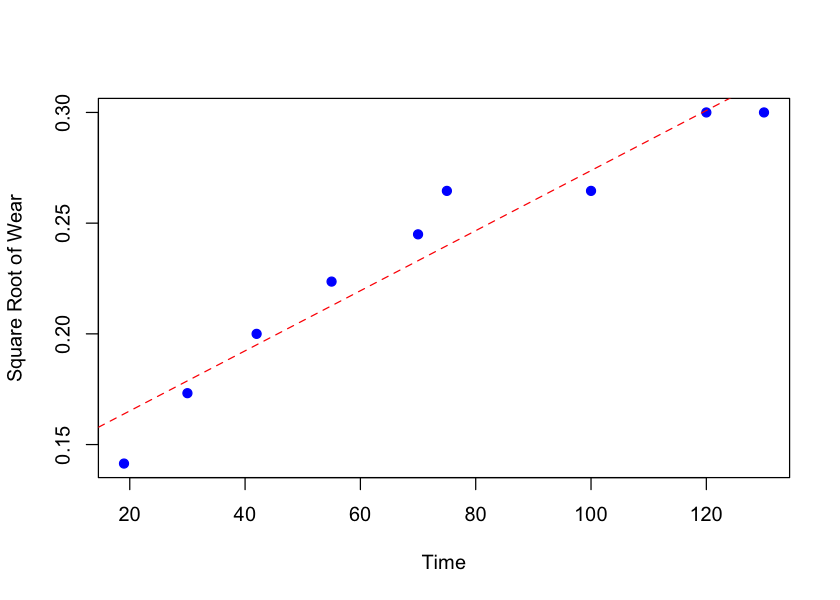

In [171]:
plot(df_f$Time, sqrt(df_f$Wear), pch=19, xlab='Time', ylab='Square Root of Wear', col='blue')
abline(a=model.summ$coefficients[1], b=model.summ$coefficients[2], col='red', lty=2)

### Residuals vs. Regressor Plot

In [172]:
plot(sqrt(df_f$Time),  model.summ$residuals, pch=19, xlab='Regressor', ylab='Residual', col='blue')
abline(h=0, col='red', lty=2)

0.09888508,0.0905353,0.07494047,0.0575183,0.05431005,0.04523765,0.03804512,0.03195822,0.02684439
